In [2]:
# import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Task 1: Implementing the intensity transformation

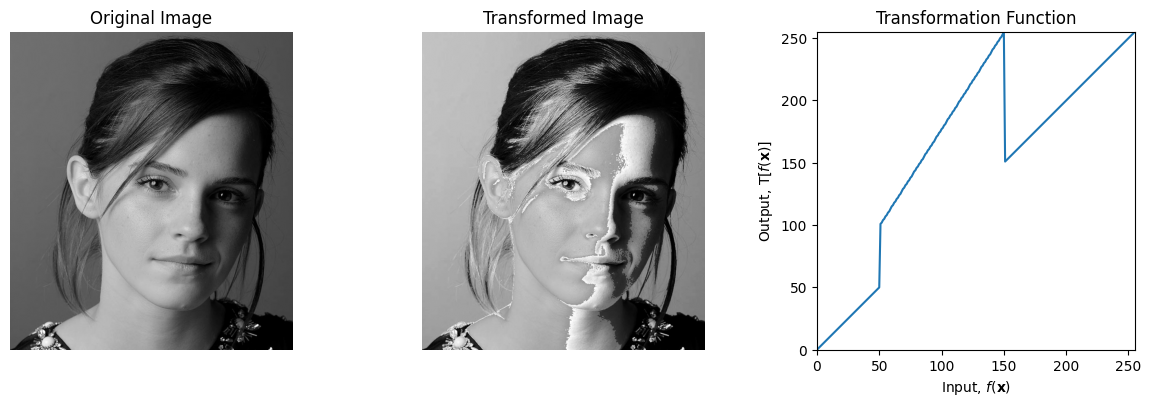

In [3]:
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

t1 = np.linspace(0, c[0, 0], c[0, 1] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')
t5 = np.linspace(c[3, 1] + 1, c[4, 1], c[4, 0] - c[3, 0]).astype('uint8')

transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype('uint8')
im_emma = cv.imread("a1images\\emma.jpg", cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(im_emma, cmap='gray', vmin=0, vmax=255)
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(cv.LUT(im_emma, transform), cmap='gray', vmin=0, vmax=255)
ax[1].axis('off')
ax[1].set_title('Transformed Image')

ax[2].plot(transform)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\\mathrm{T}[f(\\mathbf{x})]$')
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
ax[2].set_aspect('equal')

plt.tight_layout()
plt.show()

### Task 2: Apply operations to accentuate
(a) white matter
(b) gray matter

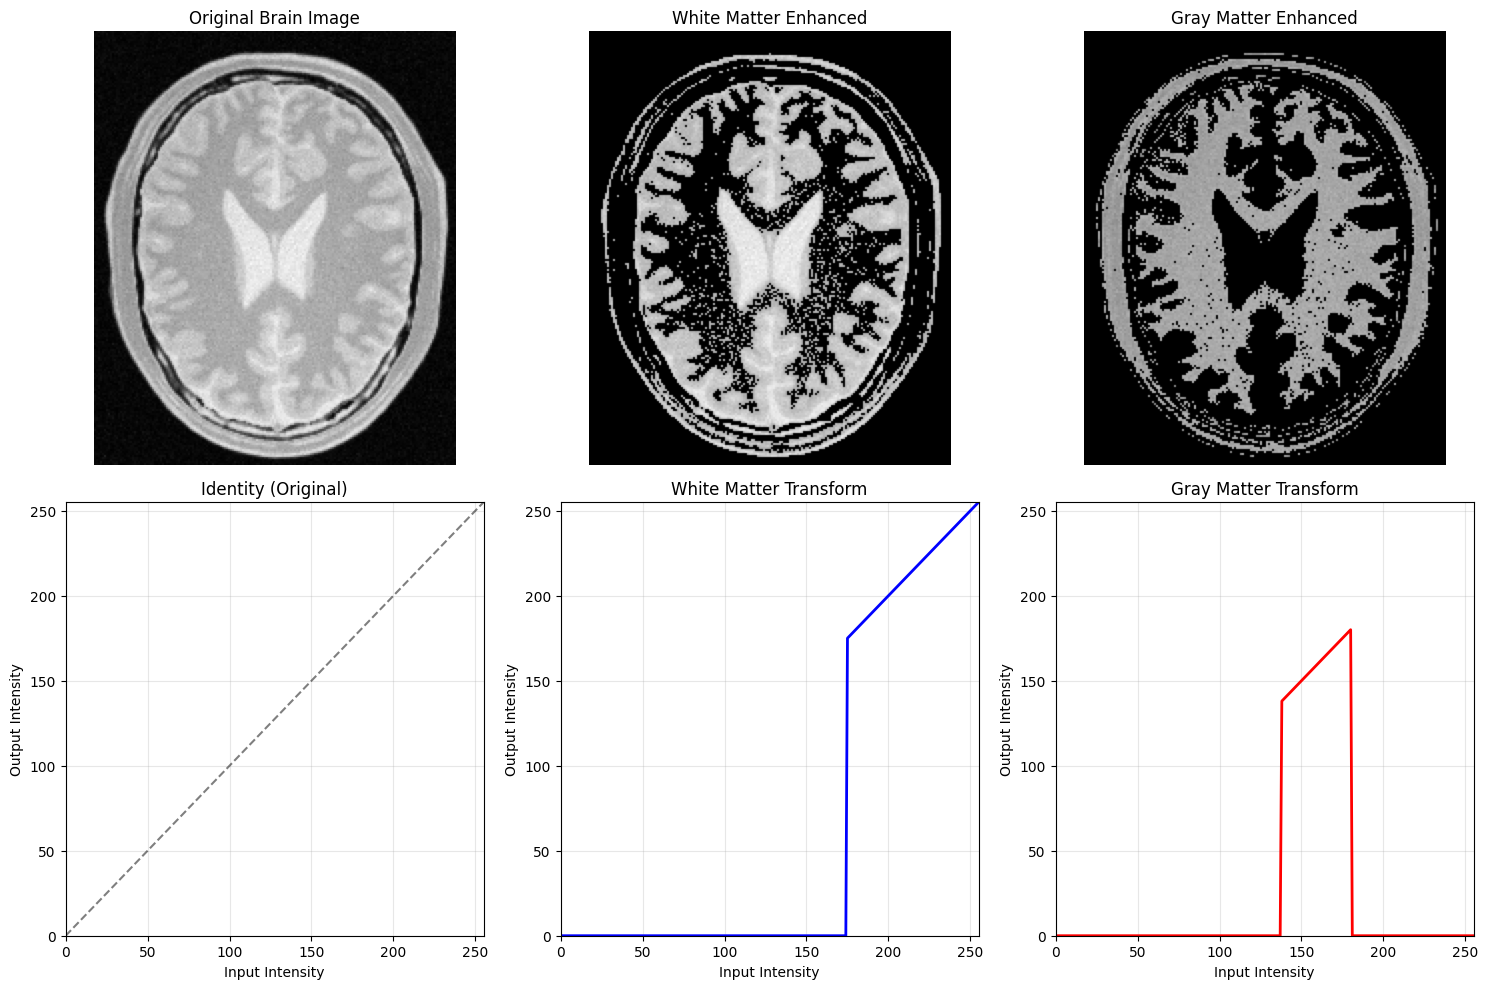

In [4]:
# Load brain image
img_orig = cv.imread("a1images\\brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

# Task 2a: Accentuate white matter (higher intensity regions)
def create_white_matter_lut(threshold=175):
    lut = np.arange(256, dtype='uint8')
    lut[lut < threshold] = 0
    return lut

# Task 2b: Accentuate gray matter (mid-intensity regions)
def create_gray_matter_lut(lower=138, upper=180):
    lut = np.arange(256, dtype='uint8')
    lut[(lut < lower) | (lut > upper)] = 0
    return lut

# Create transformation lookup tables
white_matter = create_white_matter_lut(175)
gray_matter = create_gray_matter_lut(138, 180)

# Apply transformations
white_transform = cv.LUT(img_orig, white_matter)
gray_transform = cv.LUT(img_orig, gray_matter)

# Display results
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Top row: Images
ax[0, 0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Brain Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(white_transform, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('White Matter Enhanced')
ax[0, 1].axis('off')

ax[0, 2].imshow(gray_transform, cmap='gray', vmin=0, vmax=255)
ax[0, 2].set_title('Gray Matter Enhanced')
ax[0, 2].axis('off')

# Bottom row: Transformation functions
ax[1, 0].plot(range(256), range(256), 'k--', alpha=0.5, label='Identity')
ax[1, 0].set_title('Identity (Original)')
ax[1, 0].set_xlabel('Input Intensity')
ax[1, 0].set_ylabel('Output Intensity')
ax[1, 0].set_xlim(0, 255)
ax[1, 0].set_ylim(0, 255)
ax[1, 0].grid(True, alpha=0.3)

ax[1, 1].plot(white_matter, 'b-', linewidth=2)
ax[1, 1].set_title('White Matter Transform')
ax[1, 1].set_xlabel('Input Intensity')
ax[1, 1].set_ylabel('Output Intensity')
ax[1, 1].set_xlim(0, 255)
ax[1, 1].set_ylim(0, 255)
ax[1, 1].grid(True, alpha=0.3)

ax[1, 2].plot(gray_matter, 'r-', linewidth=2)
ax[1, 2].set_title('Gray Matter Transform')
ax[1, 2].set_xlabel('Input Intensity')
ax[1, 2].set_ylabel('Output Intensity')
ax[1, 2].set_xlim(0, 255)
ax[1, 2].set_ylim(0, 255)
ax[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# print(f"White matter enhancement: Highlights intensities above {white_threshold_lower}")
# print(f"Gray matter enhancement: Highlights intensities between {gray_threshold_lower}-{gray_threshold_upper}")

### Task 3: Gamma correction in L*a*b* color space

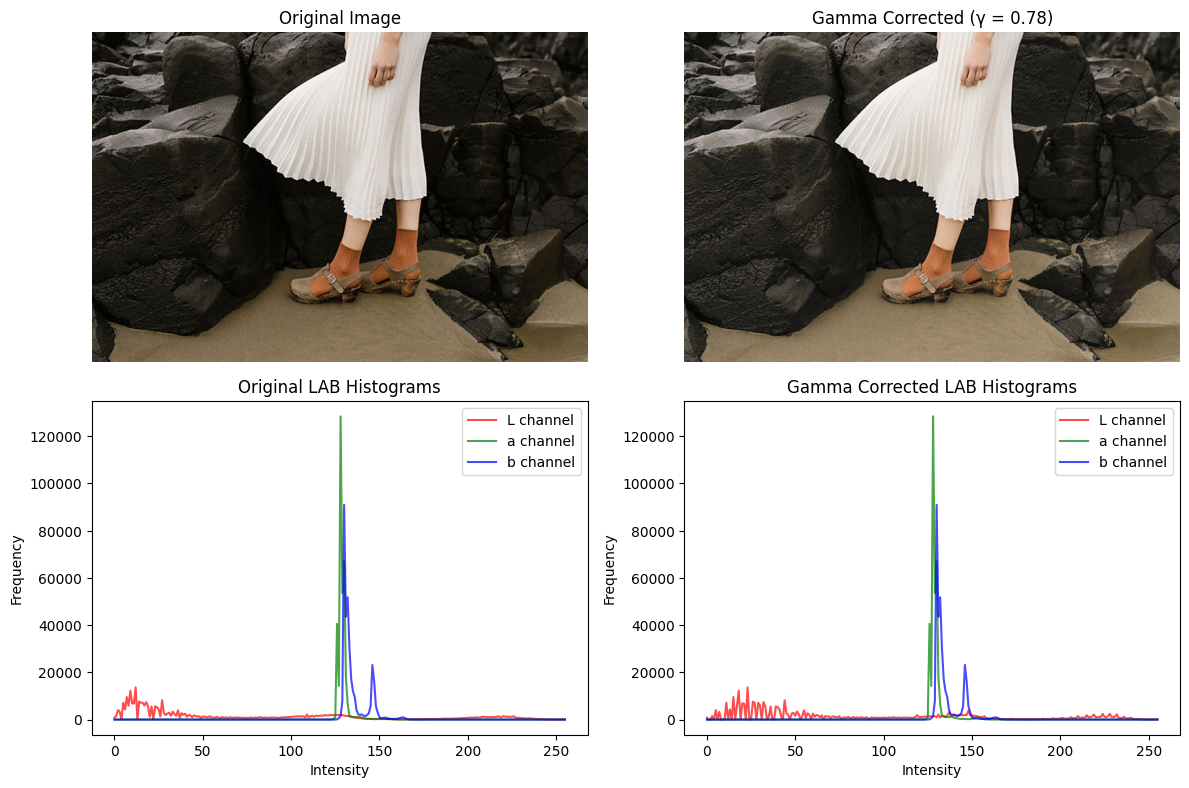

In [5]:
im = cv.imread("a1images\\highlights_and_shadows.jpg")  # Read normally first
im_lab = cv.cvtColor(im, cv.COLOR_BGR2LAB)
L, a, b = cv.split(im_lab)

gamma = 0.78
L_corrected = np.array([((i / 255.0) ** gamma) * 255.0 for i in range(0, 256)]).astype('uint8')
L_gamma = cv.LUT(L, L_corrected)

lab_corrected = cv.merge((L_gamma, a, b))
im_corrected = cv.cvtColor(lab_corrected, cv.COLOR_LAB2RGB)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Original and corrected images
ax[0, 0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(im_corrected)  # Remove the extra cvtColor call
ax[0, 1].set_title(f'Gamma Corrected (γ = {gamma})')
ax[0, 1].axis('off')

space = ('L', 'a', 'b')
colors = ('red', 'green', 'blue')
images = [im_lab, lab_corrected]
titles = ['Original LAB Histograms', 'Gamma Corrected LAB Histograms']

for j, (img, title) in enumerate(zip(images, titles)):
    for i, (channel, color) in enumerate(zip(space, colors)):
        hist = cv.calcHist([img], [i], None, [256], [0, 256])
        ax[1, j].plot(hist, color=color, label=f'{channel} channel', alpha=0.7)
    
    ax[1, j].set_title(title)
    ax[1, j].set_xlabel('Intensity')
    ax[1, j].set_ylabel('Frequency')
    ax[1, j].legend()

plt.tight_layout()
plt.show()

### Task 4: Vibrance via saturation-plane intensity transformation (interactive)

We increase vibrance by boosting the saturation channel S in HSV using:

f(x) = min(x + a * 128 * exp(-(x - 128)^2 / (2σ^2)), 255)

- x: input saturation (0–255)
- a ∈ [0, 1] controls boost strength (use the slider)
- σ = 70 controls the width of the boost around mid saturation

In [6]:
from ipywidgets import interact, FloatSlider

img = cv.imread("a1images\\spider.png")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

sigma = 70.0
x = np.arange(256, dtype=np.float32)

def vibranceCurve(a):
    boost = a * 128.0 * np.exp(-((x - 128.0) ** 2) / (2.0 * sigma * sigma))
    fx = np.minimum(x + boost, 255.0)
    return fx.astype(np.uint8)

@interact(a=FloatSlider(value=0.6, min=0.0, max=1.0, step=0.02, description='a'))
def applyVibrance(a=0.6):

    img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(img_hsv)

    # Build LUT for current 'a' and apply to S channel
    lut = vibranceCurve(a)
    s_boost = cv.LUT(s, lut)

    # Recombine and convert back to RGB for display
    hsv_boost = cv.merge([h, s_boost, v])
    img_boost_bgr = cv.cvtColor(hsv_boost, cv.COLOR_HSV2BGR)
    img_boost_rgb = cv.cvtColor(img_boost_bgr, cv.COLOR_BGR2RGB)

    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(img_rgb)
    ax[0].set_title('Original (RGB)')
    ax[0].axis('off')

    ax[1].imshow(img_boost_rgb)
    ax[1].set_title(f'Vibrance Enhanced (a = {a:.2f})')
    ax[1].axis('off')

    ax[2].plot(x, x, 'k--', alpha=0.5, label='Identity')
    ax[2].plot(x, vibranceCurve(a), label='f(x)')
    ax[2].set_title('Saturation Transformation f(x)')
    ax[2].set_xlabel('Input S')
    ax[2].set_ylabel('Output S')
    ax[2].set_xlim(0, 255)
    ax[2].set_ylim(0, 255)
    ax[2].legend()
    ax[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Chosen a: {a:.2f}")

interactive(children=(FloatSlider(value=0.6, description='a', max=1.0, step=0.02), Output()), _dom_classes=('w…

### Task 5: Historgram equilization

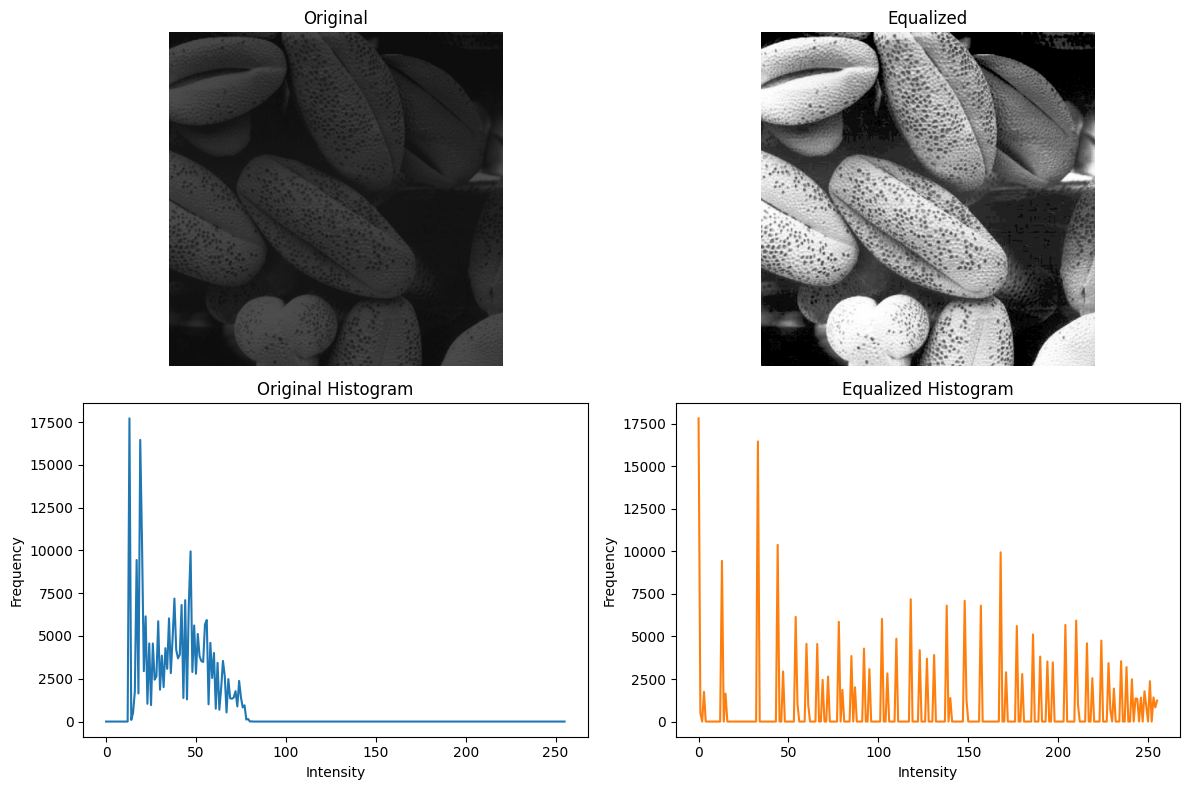

In [7]:
def hist_equalize(img_gray: np.ndarray):

    hist, _ = np.histogram(img_gray.ravel(), bins=256, range=(0, 256))

    # CDF (cumulative distribution function)
    cdf = hist.cumsum()

    # Normalize CDF to 0..255 using the standard formula with cdf_min
    cdf_min = cdf[cdf > 0].min() if np.any(cdf > 0) else 0
    denom = (img_gray.size - cdf_min) if img_gray.size > cdf_min else 1
    lut = np.round((cdf - cdf_min) * 255.0 / denom).clip(0, 255).astype(np.uint8)

    # Map using LUT
    eq = lut[img_gray]

    # Histogram after
    hist_after, _ = np.histogram(eq.ravel(), bins=256, range=(0, 256))
    return eq, hist, hist_after

img_gray = cv.imread("a1images\\shells.tif", cv.IMREAD_GRAYSCALE)

img_eq, hist_before, hist_after = hist_equalize(img_gray)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].imshow(img_gray, cmap="gray", vmin=0, vmax=255)
ax[0, 0].set_title(f"Original")
ax[0, 0].axis("off")

ax[0, 1].imshow(img_eq, cmap="gray", vmin=0, vmax=255)
ax[0, 1].set_title("Equalized")
ax[0, 1].axis("off")

ax[1, 0].plot(hist_before, color="tab:blue")
ax[1, 0].set_title("Original Histogram")
ax[1, 0].set_xlabel("Intensity")
ax[1, 0].set_ylabel("Frequency")

ax[1, 1].plot(hist_after, color="tab:orange")
ax[1, 1].set_title("Equalized Histogram")
ax[1, 1].set_xlabel("Intensity")
ax[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Task 6: Histogram equalization on foreground only

(a) Open the color image (Fig. 6), convert to HSV, and display H, S, V planes in grayscale.
(b) Select a suitable plane to threshold and extract a binary foreground mask.
(c) Use `cv.bitwise_and` to obtain the foreground; compute its histogram (on the chosen plane).
(d) Compute the cumulative sum (`np.cumsum`) of that histogram.
(e) Equalize the foreground using the standard histogram equalization formula on the chosen plane only.
(f) Keep the background unchanged and composite it with the equalized foreground; show H, S, V, mask, original, and final result.

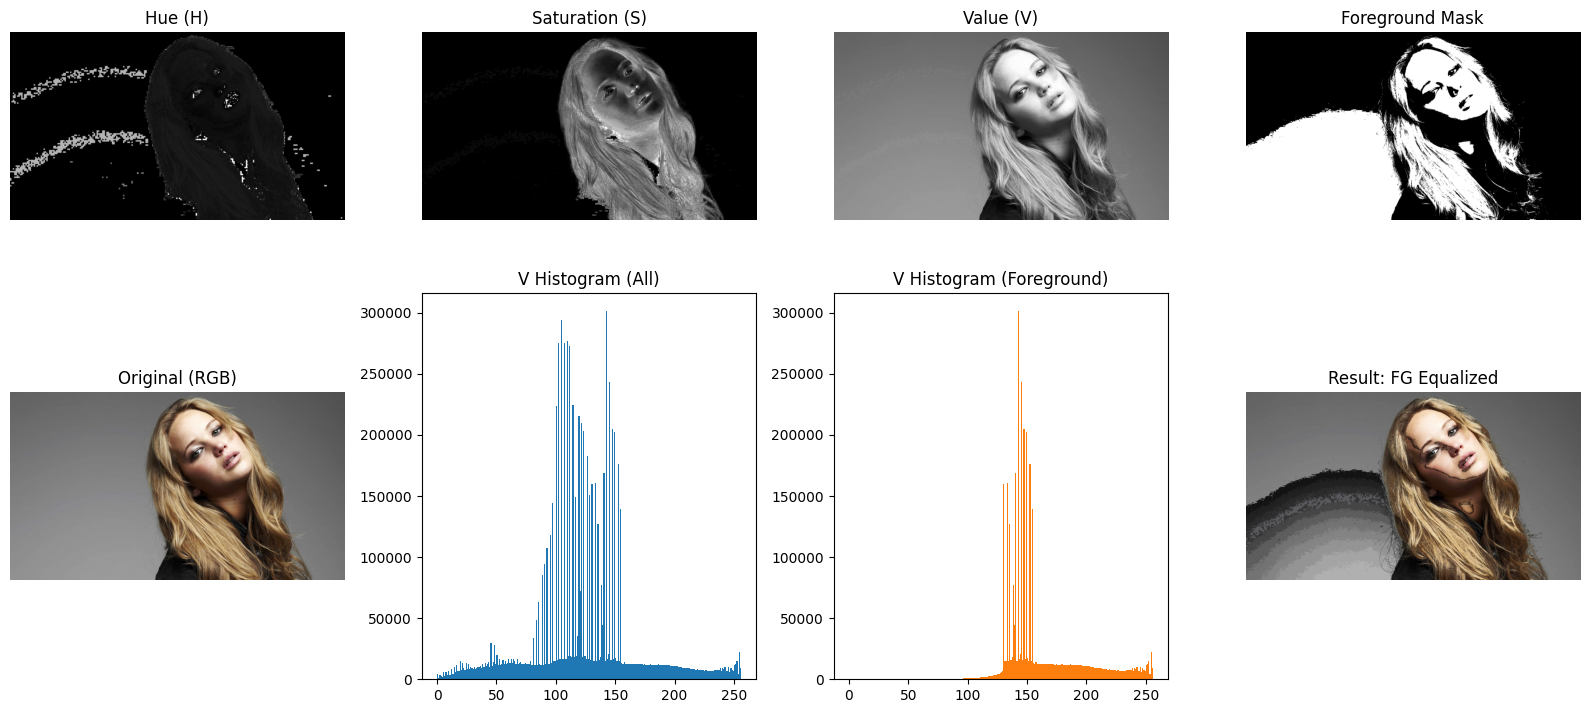

In [8]:
# Load the image for Fig. 6 (using 'daisy.jpg' as the example color image in a1images)
img_bgr = cv.imread("a1images\\jeniffer.jpg")
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# (a) Convert to HSV and show H, S, V in grayscale
img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)
H, S, V = cv.split(img_hsv)

# (b) Select plane to threshold: use V (value/brightness) and Otsu to get a binary mask
# Objects (flower) are generally brighter than background in this image
_, mask = cv.threshold(V, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
mask_fg = (mask > 0).astype(np.uint8)           # 1 for foreground, 0 for background
mask_bg = (1 - mask_fg).astype(np.uint8)

# Optional small cleanups (closing small holes)
k = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
mask_fg = cv.morphologyEx(mask_fg, cv.MORPH_CLOSE, k)
mask_bg = (1 - mask_fg).astype(np.uint8)

# (c) Foreground only on V using mask
V_fg = V.copy()
V_fg[mask_bg == 1] = 0  # zero-out background intensities for histogram

# Compute histogram on foreground pixels only
vals = V[mask_fg == 1]
if vals.size == 0:
    raise ValueError("No foreground detected by the mask; adjust thresholding.")
hist, _ = np.histogram(vals, bins=256, range=(0, 256))

# (d) Cumulative sum (CDF)
cdf = np.cumsum(hist)

# (e) Equalize the foreground V using standard formula on foreground pixels
cdf_min = cdf[cdf > 0].min() if np.any(cdf > 0) else 0
denom = (vals.size - cdf_min) if vals.size > cdf_min else 1
# Build LUT from CDF for full [0,255] spread
lut = np.round((cdf - cdf_min) * 255.0 / denom).clip(0, 255).astype(np.uint8)

# Apply LUT to V, but only change foreground
V_eq = V.copy()
V_eq[mask_fg == 1] = lut[V[mask_fg == 1]]

# (f) Keep background unchanged; compose result
hsv_eq = cv.merge([H, S, V_eq])
res_bgr = cv.cvtColor(hsv_eq, cv.COLOR_HSV2BGR)
res_rgb = cv.cvtColor(res_bgr, cv.COLOR_BGR2RGB)

# Visualize required outputs
fig, ax = plt.subplots(2, 4, figsize=(16, 8))
ax[0, 0].imshow(H, cmap='gray'); ax[0, 0].set_title('Hue (H)'); ax[0, 0].axis('off')
ax[0, 1].imshow(S, cmap='gray'); ax[0, 1].set_title('Saturation (S)'); ax[0, 1].axis('off')
ax[0, 2].imshow(V, cmap='gray'); ax[0, 2].set_title('Value (V)'); ax[0, 2].axis('off')
ax[0, 3].imshow(mask_fg*255, cmap='gray'); ax[0, 3].set_title('Foreground Mask'); ax[0, 3].axis('off')

ax[1, 0].imshow(img_rgb); ax[1, 0].set_title('Original (RGB)'); ax[1, 0].axis('off')
ax[1, 1].hist(V.ravel(), bins=256, range=(0, 256), color='tab:blue'); ax[1, 1].set_title('V Histogram (All)')
ax[1, 2].hist(vals.ravel(), bins=256, range=(0, 256), color='tab:orange'); ax[1, 2].set_title('V Histogram (Foreground)')
ax[1, 3].imshow(res_rgb); ax[1, 3].set_title('Result: FG Equalized'); ax[1, 3].axis('off')

plt.tight_layout(); plt.show()

### Task 7: Sobel Filtering

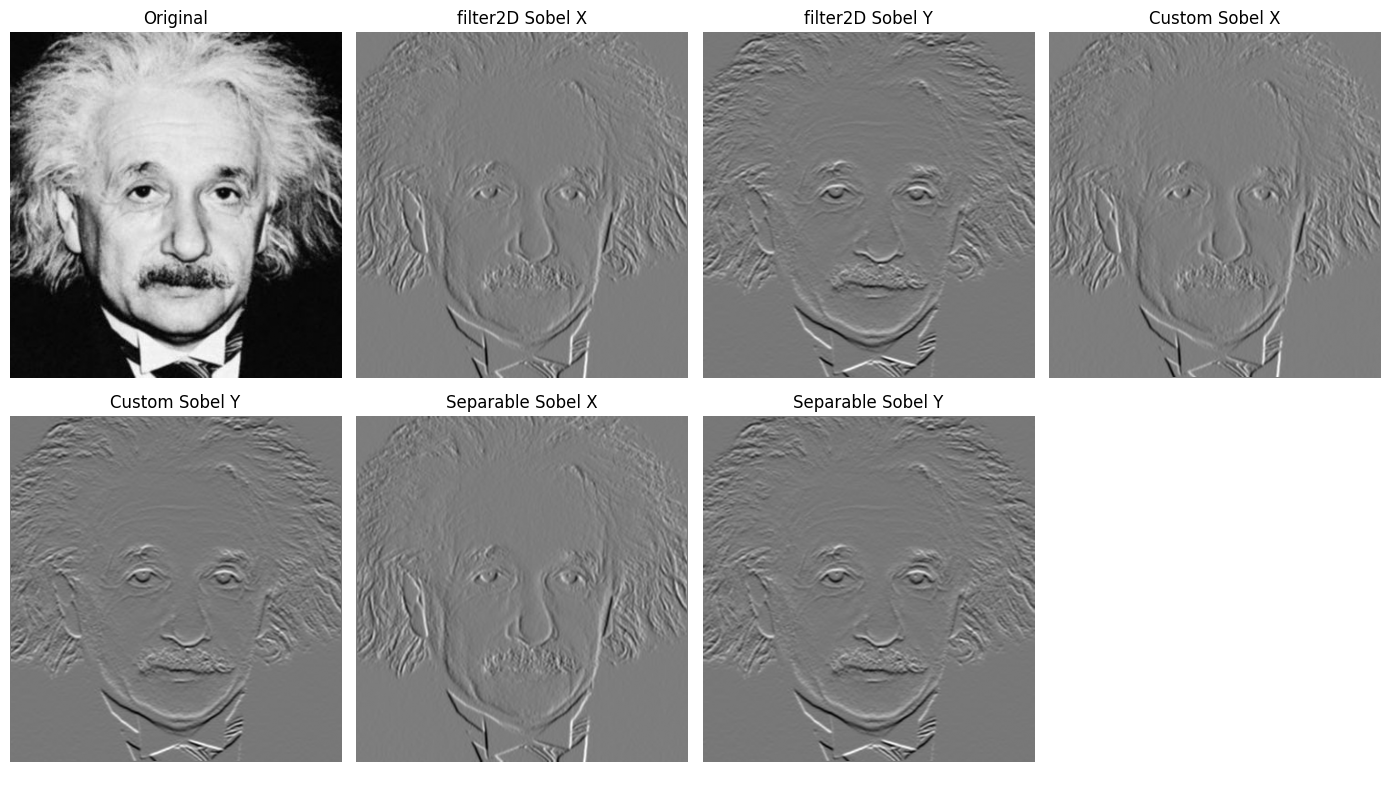

In [ ]:
# Task 7 (simplified): Sobel filtering (einstein)
# Show only: Original, filter2D, Custom, Separable (gradient magnitude)

# Load image (grayscale)
img = cv.imread("a1images\\einstein.png", cv.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Could not load 'a1images\\einstein.png'. Check the path.")

# Sobel kernels
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# (a) filter2D
im_x = cv.filter2D(img, cv.CV_64F, sobel_x)
im_y = cv.filter2D(img, cv.CV_64F, sobel_y)

# (b) Custom convolution (exact same logic structure you provided)
# NOTE: Leaves a 1-pixel zero border (no padding), computes valid 3x3 windows.
def apply_filter(image, filter):
    rows, cols = image.shape
    result = np.zeros((rows, cols), dtype=np.float64)

    for r in range(rows - 2):
        for c in range(cols - 2):
            patch = image[r:r+3, c:c+3]
            result[r + 1, c + 1] = np.sum(filter * patch)
    return result

im_x_custom = apply_filter(img, sobel_x)
im_y_custom = apply_filter(img, sobel_y)


# (c) Separable (associative property)
# Gx = [1 2 1]^T * [1 0 -1]
kernel_gx_col = np.array([[1], [2], [1]], dtype=np.float32) # Column vector
kernel_gx_row = np.array([[1, 0, -1]], dtype=np.float32) # Row vector

# Gy = [1 0 -1]^T * [1 2 1]
kernel_gy_col = np.array([[1], [0], [-1]], dtype=np.float32) # Column vector
kernel_gy_row = np.array([[1, 2, 1]], dtype=np.float32) # Row vector

# Apply separable filters for Gx
im_x_separable_temp = cv.filter2D(img, cv.CV_64F, kernel_gx_row)
im_x_separable = cv.filter2D(im_x_separable_temp, cv.CV_64F, kernel_gx_col)

# Apply separable filters for Gy
im_y_separable_temp = cv.filter2D(img, cv.CV_64F, kernel_gy_row)
im_y_separable = cv.filter2D(im_y_separable_temp, cv.CV_64F, kernel_gy_col)

# Show outputs
fig, ax = plt.subplots(2, 4, figsize=(14, 8))
ax[0, 0].imshow(img, cmap='gray'); ax[0, 0].set_title('Original'); ax[0, 0].axis('off')
ax[0, 1].imshow(im_x, cmap='gray'); ax[0, 1].set_title('filter2D Sobel X'); ax[0, 1].axis('off')
ax[0, 2].imshow(im_y, cmap='gray'); ax[0, 2].set_title('filter2D Sobel Y'); ax[0, 2].axis('off')
ax[0, 3].imshow(im_x_custom, cmap='gray'); ax[0, 3].set_title('Custom Sobel X'); ax[0, 3].axis('off')
ax[1, 0].imshow(im_y_custom, cmap='gray'); ax[1, 0].set_title('Custom Sobel Y'); ax[1, 0].axis('off')
ax[1, 1].imshow(im_x_separable, cmap='gray'); ax[1, 1].set_title('Separable Sobel X'); ax[1, 1].axis('off')
ax[1, 2].imshow(im_y_separable, cmap='gray'); ax[1, 2].set_title('Separable Sobel Y'); ax[1, 2].axis('off')
ax[1, 3].axis('off')

plt.tight_layout(); plt.show()

### Task 8: Image Zoom (Nearest Neighbour & Bilinear) + Normalized SSD

Requirements:
1. Implement a function `zoom_image(img, scale, method)` for scale s in (0, 10].
   - `method='nearest'`: nearest-neighbour interpolation.
   - `method='bilinear'`: bilinear interpolation (separable, weighted average of 4 neighbours).
2. Provided: four downscaled images and their originals in `a1images/a1q5images/`.
3. Upscale each small image by factor 4 and compare with its original using normalized SSD:
   \[ \text{nSSD} = \frac{\sum (I_{up} - I_{orig})^2}{\sum I_{orig}^2 + \varepsilon} \]
4. Print a table of nSSD for nearest vs bilinear (lower is better).
5. Display (a) one small image, (b) its 4× nearest result, (c) its 4× bilinear result, (d) its original.

Notes:
- If channel counts differ (gray vs color) convert grayscale to 3-channel BGR for fair comparison.
- Minor size rounding differences after scaling are trimmed to match original size.
- Bilinear coordinate mapping uses pixel-center alignment: (dst + 0.5)/scale - 0.5.


In [10]:
# Task 8 (simplified): Zoom with nearest & bilinear + normalized SSD

import numpy as np, cv2 as cv, matplotlib.pyplot as plt

# Simple zoom (supports gray or color)
def zoom_image(img, scale, method='nearest'):
    if not (0 < scale <= 10):
        raise ValueError('scale must be in (0,10]')
    h, w = img.shape[:2]
    H = max(1, int(round(h*scale)))
    W = max(1, int(round(w*scale)))

    if method == 'nearest':
        ys = (np.arange(H)/scale).astype(int).clip(0, h-1)
        xs = (np.arange(W)/scale).astype(int).clip(0, w-1)
        if img.ndim == 2:
            return img[ys][:, xs]
        return img[ys][:, xs, :]

    if method != 'bilinear':
        raise ValueError("method must be 'nearest' or 'bilinear'")

    # Bilinear (naive loops for clarity)
    if img.ndim == 2:
        out = np.empty((H, W), img.dtype)
    else:
        out = np.empty((H, W, img.shape[2]), img.dtype)

    for i in range(H):
        y = i/scale
        y0 = int(np.floor(y)); y1 = min(y0+1, h-1)
        dy = y - y0
        for j in range(W):
            x = j/scale
            x0 = int(np.floor(x)); x1 = min(x0+1, w-1)
            dx = x - x0
            if img.ndim == 2:
                a = img[y0, x0]
                b = img[y0, x1]
                c = img[y1, x0]
                d = img[y1, x1]
            else:
                a = img[y0, x0, :]
                b = img[y0, x1, :]
                c = img[y1, x0, :]
                d = img[y1, x1, :]
            top = a*(1-dx) + b*dx
            bot = c*(1-dx) + d*dx
            out[i, j] = top*(1-dy) + bot*dy
    return out

# Normalized SSD
def nssd(a, b):
    a32 = a.astype(np.float32); b32 = b.astype(np.float32)
    return float(((a32-b32)**2).sum() / (b32*b32).sum())

pairs = [
    ("a1images/a1q5images/im01small.png", "a1images/a1q5images/im01.png"),
    ("a1images/a1q5images/im02small.png", "a1images/a1q5images/im02.png"),
    ("a1images/a1q5images/im03small.png", "a1images/a1q5images/im03.png"),
    ("a1images/a1q5images/taylor_small.jpg", "a1images/a1q5images/taylor.jpg"),
]

scale = 4
print(f"Normalized SSD (scale x{scale})")
print(f"{'Small Image':40s}  {'Nearest':>10s}  {'Bilinear':>10s}")
first_visual = None
for sp, op in pairs:
    small = cv.imread(sp, cv.IMREAD_UNCHANGED)
    orig = cv.imread(op, cv.IMREAD_UNCHANGED)
    if small is None or orig is None:
        print(f"Missing: {sp}")
        continue
    # Match channels
    if small.ndim != orig.ndim:
        if small.ndim == 2: small = cv.cvtColor(small, cv.COLOR_GRAY2BGR)
        else: orig = cv.cvtColor(orig, cv.COLOR_GRAY2BGR)

    up_near = zoom_image(small, scale, 'nearest')
    up_bilin = zoom_image(small, scale, 'bilinear')
    oh, ow = orig.shape[:2]
    up_near = up_near[:oh, :ow]
    up_bilin = up_bilin[:oh, :ow]

    ssd_n = nssd(up_near, orig)
    ssd_b = nssd(up_bilin, orig)
    print(f"{sp:40s}  {ssd_n:10.6f}  {ssd_b:10.6f}")
    if first_visual is None:
        first_visual = (small, up_near, up_bilin, orig)

# Show one visual example
if first_visual:
    small, up_near, up_bilin, orig = first_visual
    def show(x):
        if x.ndim == 3: return cv.cvtColor(x, cv.COLOR_BGR2RGB)
        return x
    fig, ax = plt.subplots(1, 4, figsize=(12, 4))
    titles = ['Small', 'Nearest x4', 'Bilinear x4', 'Original']
    imgs = [small, up_near, up_bilin, orig]
    for k in range(4):
        ax[k].imshow(show(imgs[k]), cmap='gray' if imgs[k].ndim==2 else None)
        ax[k].set_title(titles[k]); ax[k].axis('off')
    plt.tight_layout(); plt.show()

Normalized SSD (scale x4)
Small Image                                  Nearest    Bilinear
a1images/a1q5images/im01small.png           0.012058    0.017719
a1images/a1q5images/im01small.png           0.012058    0.017719
a1images/a1q5images/im02small.png           0.004190    0.007757
a1images/a1q5images/im02small.png           0.004190    0.007757
a1images/a1q5images/im03small.png           0.007668    0.011126
a1images/a1q5images/im03small.png           0.007668    0.011126


ValueError: operands could not be broadcast together with shapes (448,800,3) (560,1000,3) 

### Task 9: GrabCut segmentation and background blur

(a) Segment the flower using GrabCut and show the final mask, foreground, and background.
(b) Create an enhanced image with a strongly blurred background, shown next to the original.
(c) Discuss the dark halo near the flower edge after enhancement.

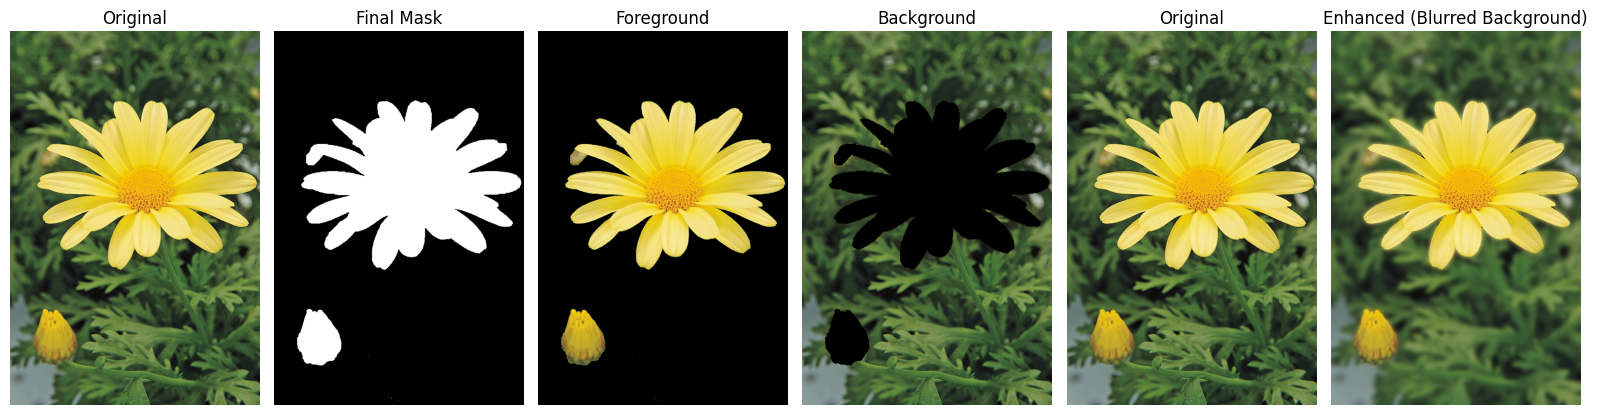

Why is the background near the flower edge dark?
- GrabCut labels an uncertain thin band around boundaries as probable background in places.
- When compositing, any semi- or fully background-labeled pixels pick blurred/darker values,
  producing a dark halo right outside the subject due to color bleeding and soft edges.
- Also, strong blur averages dark and light regions across the boundary, pulling values darker.


In [ ]:
# Use daisy.jpg as the flower image (Fig. 82)
img = cv.imread("a1images\\daisy.jpg")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
H, W = img.shape[:2]

# Initial rectangle around the main subject
margin_y, margin_x = int(0.01*H), int(0.01*W)
rect = (margin_x, margin_y, W - 2*margin_x, H - 2*margin_y)

mask = np.zeros((H, W), np.uint8)
bgModel = np.zeros((1, 65), np.float64)
fgModel = np.zeros((1, 65), np.float64)
cv.grabCut(img, mask, rect, bgModel, fgModel, 5, cv.GC_INIT_WITH_RECT)

# Create binary masks
mask_final = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype("uint8")
mask_bg = 1 - mask_final

# Foreground and background images
foreground = (img_rgb * mask_final[..., None]).astype(np.uint8)
background = (img_rgb * mask_bg[..., None]).astype(np.uint8)

# Blur the background
blurred_bg_rgb = cv.GaussianBlur(img_rgb, (29, 29), 0)
enhanced_rgb = (foreground + blurred_bg_rgb * mask_bg[..., None]).astype(np.uint8)


fig, ax = plt.subplots(1, 6, figsize=(16, 10))
ax[0].imshow(img_rgb); ax[0].set_title('Original'); ax[0].axis('off')
ax[1].imshow(mask_final*255, cmap='gray'); ax[1].set_title('Final Mask'); ax[1].axis('off')
ax[2].imshow(foreground); ax[2].set_title('Foreground'); ax[2].axis('off')
ax[3].imshow(background); ax[3].set_title('Background'); ax[3].axis('off')
ax[4].imshow(img_rgb); ax[4].set_title('Original'); ax[4].axis('off')
ax[5].imshow(enhanced_rgb); ax[5].set_title('Enhanced (Blurred Background)'); ax[5].axis('off')

plt.tight_layout(); plt.show()

print('Why is the background near the flower edge dark?')
print('- GrabCut labels an uncertain thin band around boundaries as probable background in places.')
print('- When compositing, any semi- or fully background-labeled pixels pick blurred/darker values,')
print('  producing a dark halo right outside the subject due to color bleeding and soft edges.')
print('- Also, strong blur averages dark and light regions across the boundary, pulling values darker.')